### Exploratory Data Analysis of CSO data sets

In [75]:
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols




In [2]:
#the same data set was downloaded using different settings from the CSO

df1 = pd.read_csv("PEA01.20231105T141151.csv") #df1 was downloaded with the full download method
df2 = pd.read_csv("PEA01.20231105T141144.csv") #DF2 was downloaded by selecting all filtes on website



In [3]:
df1.shape

(5994, 10)

In [4]:
df2.shape

(5994, 6)

In [5]:
df1.head

<bound method NDFrame.head of      STATISTIC                          STATISTIC Label  TLIST(A1)  Year  \
0        PEA01  Population Estimates (Persons in April)       1950  1950   
1        PEA01  Population Estimates (Persons in April)       1950  1950   
2        PEA01  Population Estimates (Persons in April)       1950  1950   
3        PEA01  Population Estimates (Persons in April)       1950  1950   
4        PEA01  Population Estimates (Persons in April)       1950  1950   
...        ...                                      ...        ...   ...   
5989     PEA01  Population Estimates (Persons in April)       2023  2023   
5990     PEA01  Population Estimates (Persons in April)       2023  2023   
5991     PEA01  Population Estimates (Persons in April)       2023  2023   
5992     PEA01  Population Estimates (Persons in April)       2023  2023   
5993     PEA01  Population Estimates (Persons in April)       2023  2023   

     C02076V02508          Age Group C02199V02655        

In [6]:
df2.head

<bound method NDFrame.head of                               STATISTIC Label  Year          Age Group  \
0     Population Estimates (Persons in April)  1950       Under 1 year   
1     Population Estimates (Persons in April)  1950       Under 1 year   
2     Population Estimates (Persons in April)  1950       Under 1 year   
3     Population Estimates (Persons in April)  1950        0 - 4 years   
4     Population Estimates (Persons in April)  1950        0 - 4 years   
...                                       ...   ...                ...   
5989  Population Estimates (Persons in April)  2023  85 years and over   
5990  Population Estimates (Persons in April)  2023  85 years and over   
5991  Population Estimates (Persons in April)  2023           All ages   
5992  Population Estimates (Persons in April)  2023           All ages   
5993  Population Estimates (Persons in April)  2023           All ages   

             Sex      UNIT   VALUE  
0     Both sexes  Thousand    61.1  
1      

In [7]:
df1.describe

<bound method NDFrame.describe of      STATISTIC                          STATISTIC Label  TLIST(A1)  Year  \
0        PEA01  Population Estimates (Persons in April)       1950  1950   
1        PEA01  Population Estimates (Persons in April)       1950  1950   
2        PEA01  Population Estimates (Persons in April)       1950  1950   
3        PEA01  Population Estimates (Persons in April)       1950  1950   
4        PEA01  Population Estimates (Persons in April)       1950  1950   
...        ...                                      ...        ...   ...   
5989     PEA01  Population Estimates (Persons in April)       2023  2023   
5990     PEA01  Population Estimates (Persons in April)       2023  2023   
5991     PEA01  Population Estimates (Persons in April)       2023  2023   
5992     PEA01  Population Estimates (Persons in April)       2023  2023   
5993     PEA01  Population Estimates (Persons in April)       2023  2023   

     C02076V02508          Age Group C02199V02655    

In [8]:
df2.describe

<bound method NDFrame.describe of                               STATISTIC Label  Year          Age Group  \
0     Population Estimates (Persons in April)  1950       Under 1 year   
1     Population Estimates (Persons in April)  1950       Under 1 year   
2     Population Estimates (Persons in April)  1950       Under 1 year   
3     Population Estimates (Persons in April)  1950        0 - 4 years   
4     Population Estimates (Persons in April)  1950        0 - 4 years   
...                                       ...   ...                ...   
5989  Population Estimates (Persons in April)  2023  85 years and over   
5990  Population Estimates (Persons in April)  2023  85 years and over   
5991  Population Estimates (Persons in April)  2023           All ages   
5992  Population Estimates (Persons in April)  2023           All ages   
5993  Population Estimates (Persons in April)  2023           All ages   

             Sex      UNIT   VALUE  
0     Both sexes  Thousand    61.1  
1  

In [9]:
df2.info

<bound method DataFrame.info of                               STATISTIC Label  Year          Age Group  \
0     Population Estimates (Persons in April)  1950       Under 1 year   
1     Population Estimates (Persons in April)  1950       Under 1 year   
2     Population Estimates (Persons in April)  1950       Under 1 year   
3     Population Estimates (Persons in April)  1950        0 - 4 years   
4     Population Estimates (Persons in April)  1950        0 - 4 years   
...                                       ...   ...                ...   
5989  Population Estimates (Persons in April)  2023  85 years and over   
5990  Population Estimates (Persons in April)  2023  85 years and over   
5991  Population Estimates (Persons in April)  2023           All ages   
5992  Population Estimates (Persons in April)  2023           All ages   
5993  Population Estimates (Persons in April)  2023           All ages   

             Sex      UNIT   VALUE  
0     Both sexes  Thousand    61.1  
1    

In [10]:
df1.info

<bound method DataFrame.info of      STATISTIC                          STATISTIC Label  TLIST(A1)  Year  \
0        PEA01  Population Estimates (Persons in April)       1950  1950   
1        PEA01  Population Estimates (Persons in April)       1950  1950   
2        PEA01  Population Estimates (Persons in April)       1950  1950   
3        PEA01  Population Estimates (Persons in April)       1950  1950   
4        PEA01  Population Estimates (Persons in April)       1950  1950   
...        ...                                      ...        ...   ...   
5989     PEA01  Population Estimates (Persons in April)       2023  2023   
5990     PEA01  Population Estimates (Persons in April)       2023  2023   
5991     PEA01  Population Estimates (Persons in April)       2023  2023   
5992     PEA01  Population Estimates (Persons in April)       2023  2023   
5993     PEA01  Population Estimates (Persons in April)       2023  2023   

     C02076V02508          Age Group C02199V02655      

In [11]:
#df1 has 5994 rows and 10 columns and df2 has 5994 rows and 10 column
#df2 has the same number of rows as df2 but 4 more columns
#these extra columns are: STATISTIC, TLIST(A1), C02076V02508, C02199V02655
#these columns provide no relavant information as they are redundant
#for this project Data sets from the CSO shall be downloaded using the filtered technique like df2



### Further exploratoty steps for df2

In [12]:
df2.isnull()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
5989,False,False,False,False,False,False
5990,False,False,False,False,False,False
5991,False,False,False,False,False,False
5992,False,False,False,False,False,False


In [13]:
df2_Both_sexes = "Both sexes"
filtered_data_df2_Both_sexes = df2[df2['Sex'] == df2_Both_sexes]

In [14]:
filtered_data_df2_Both_sexes.head

<bound method NDFrame.head of                               STATISTIC Label  Year          Age Group  \
0     Population Estimates (Persons in April)  1950       Under 1 year   
3     Population Estimates (Persons in April)  1950        0 - 4 years   
6     Population Estimates (Persons in April)  1950       0 - 14 years   
9     Population Estimates (Persons in April)  1950        1 - 4 years   
12    Population Estimates (Persons in April)  1950        5 - 9 years   
...                                       ...   ...                ...   
5979  Population Estimates (Persons in April)  2023      70 - 74 years   
5982  Population Estimates (Persons in April)  2023      75 - 79 years   
5985  Population Estimates (Persons in April)  2023      80 - 84 years   
5988  Population Estimates (Persons in April)  2023  85 years and over   
5991  Population Estimates (Persons in April)  2023           All ages   

             Sex      UNIT   VALUE  
0     Both sexes  Thousand    61.1  
3     B

In [15]:
x = filtered_data_df2_Both_sexes['Year']
y = filtered_data_df2_Both_sexes['VALUE']

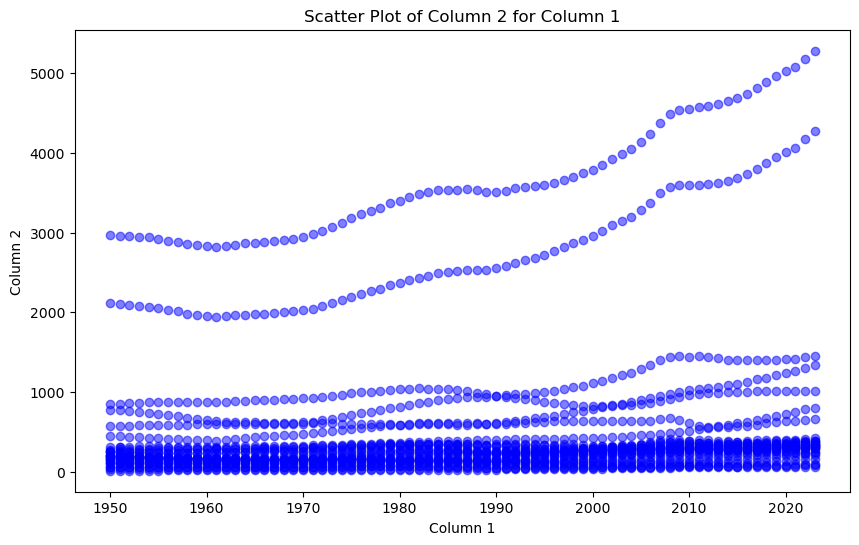

In [17]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(x, y, marker='o', color='blue', alpha=0.5)  # Create the scatter plot

# Add labels and a title
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title(f'Scatter Plot of Column 2 for Column 1')

# Display the plot
plt.show()

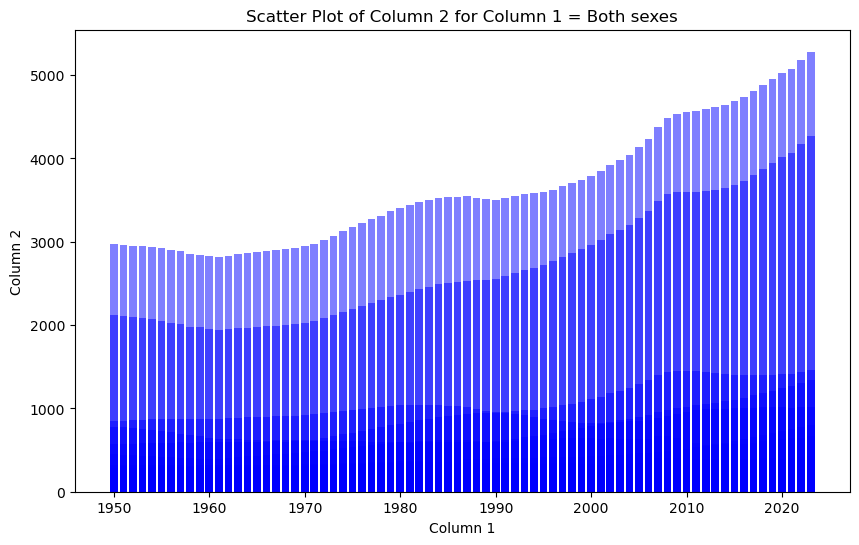

In [18]:
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(x, y, color='blue', alpha=0.5, )  

# Rotate the x-axis labels for better visibility
#plt.xticks(rotation=90)

# Add labels and a title
plt.xlabel('Column 1')
plt.ylabel('Column 2')
plt.title(f'Scatter Plot of Column 2 for Column 1 = {df2_Both_sexes}')

# Display the plot
plt.show()

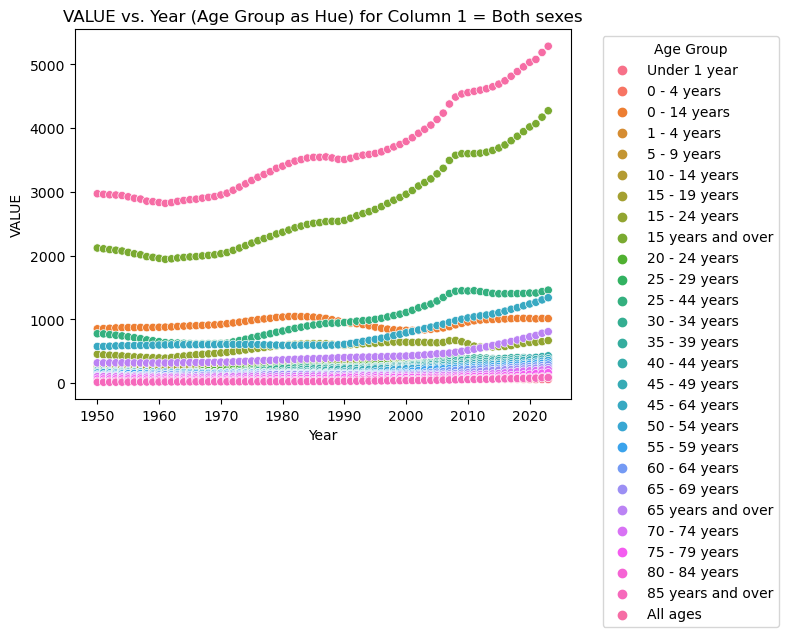

In [19]:
sns.scatterplot(data=filtered_data_df2_Both_sexes,x='Year', y='VALUE', hue='Age Group')

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.title(f'VALUE vs. Year (Age Group as Hue) for Column 1 = {df2_Both_sexes}')

# Display the plot
legend = plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


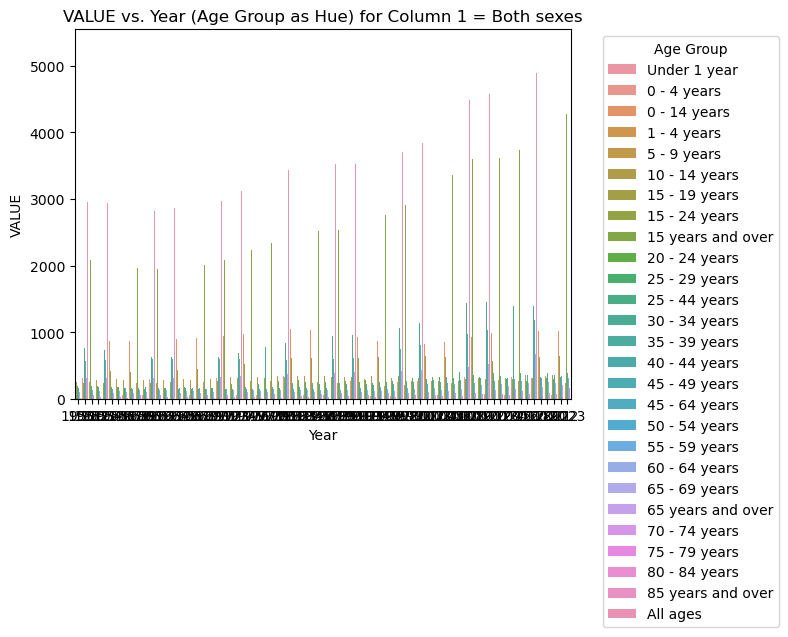

In [20]:
sns.barplot(data=filtered_data_df2_Both_sexes, x='Year', y='VALUE', hue='Age Group')

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.title(f'VALUE vs. Year (Age Group as Hue) for Column 1 = {df2_Both_sexes}')

# Display the plot
legend = plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


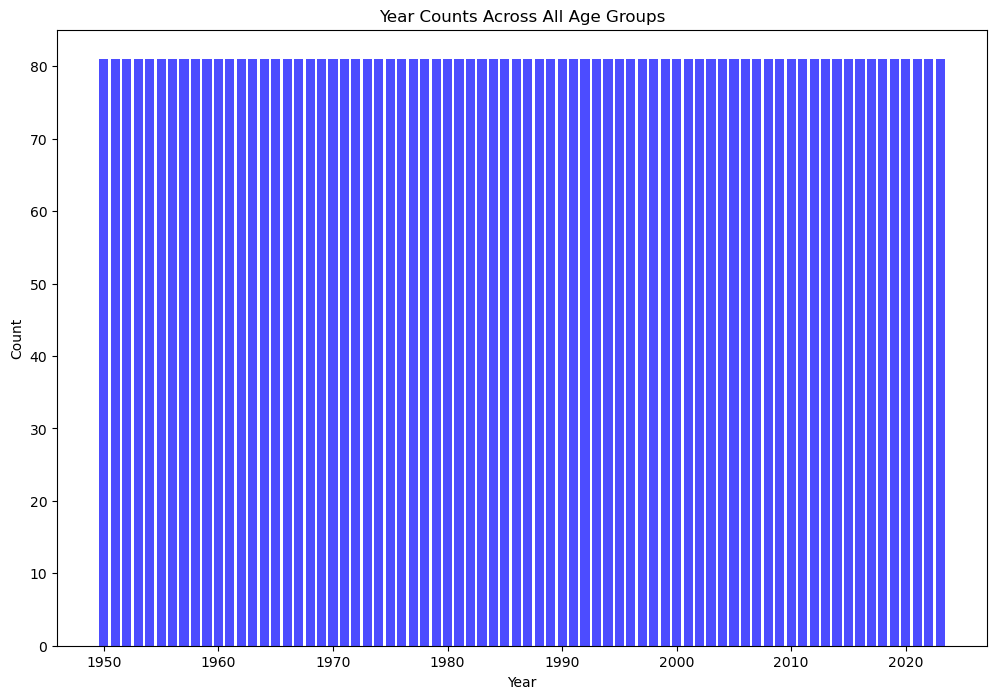

In [21]:
year_counts = df2['Year'].value_counts().sort_index()

# Create a bar chart to show the distribution of 'Year' counts
plt.figure(figsize=(12, 8))  # Set the figure size

x = year_counts.index
y = year_counts.values

plt.bar(x, y, color='blue', alpha=0.7)

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year Counts Across All Age Groups')

# Display the plot
plt.show()

In [22]:
pivoted_df = pd.pivot_table(df2, values='VALUE', index='Age Group', columns='Year')

# Optionally, fill missing values with 0
pivoted_df = pivoted_df.fillna(0)

# Display the pivoted DataFrame
print(pivoted_df)

Year                      1950         1951         1952         1953  \
Age Group                                                               
0 - 14 years        567.466667   569.866667   573.066667   576.866667   
0 - 4 years           0.000000   208.500000     0.000000     0.000000   
1 - 4 years         166.066667   166.200000   165.600000   165.400000   
10 - 14 years       174.733333   173.933333   176.400000   179.066667   
15 - 19 years       162.666667   160.766667   159.800000   159.066667   
15 - 24 years       301.733333   295.566667   291.666667   288.200000   
15 years and over  1411.866667  1403.866667  1395.533333  1389.133333   
20 - 24 years       139.066667   134.800000   131.866667   129.133333   
25 - 29 years       134.066667   132.266667   128.600000   125.133333   
25 - 44 years       515.733333   514.133333   506.866667   500.400000   
30 - 34 years       129.866667   127.700000   125.733333   123.866667   
35 - 39 years       133.200000   133.933333   131.5

In [24]:
filtered_data_df2_Both_sexes_All_ages = filtered_data_df2_Both_sexes[filtered_data_df2_Both_sexes['Age Group'] == 'All ages']

# Pivot the filtered DataFrame
pivoted_df = pd.pivot_table(filtered_data, values='VALUE', index='Year', columns='Age Group')

# Optionally, fill missing values with 0
pivoted_df = pivoted_df.fillna(0)

# Display the pivoted DataFrame
print(pivoted_df)

NameError: name 'filtered_data' is not defined

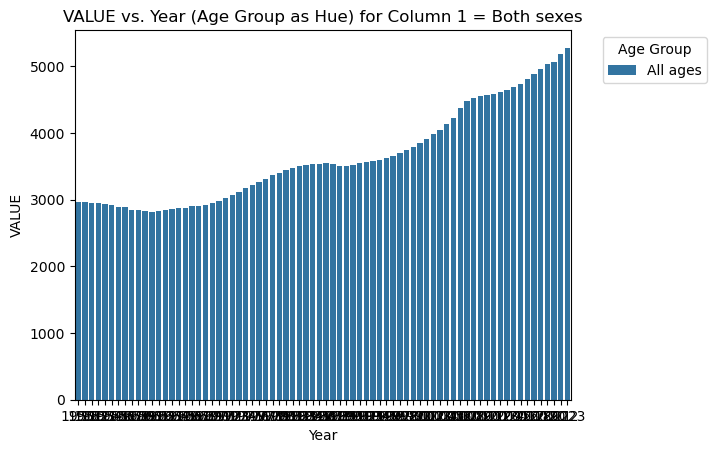

In [25]:
sns.barplot(data=filtered_data_df2_Both_sexes_All_ages, x='Year', y='VALUE', hue='Age Group')

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.title(f'VALUE vs. Year (Age Group as Hue) for Column 1 = {df2_Both_sexes}')

# Display the plot
legend = plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

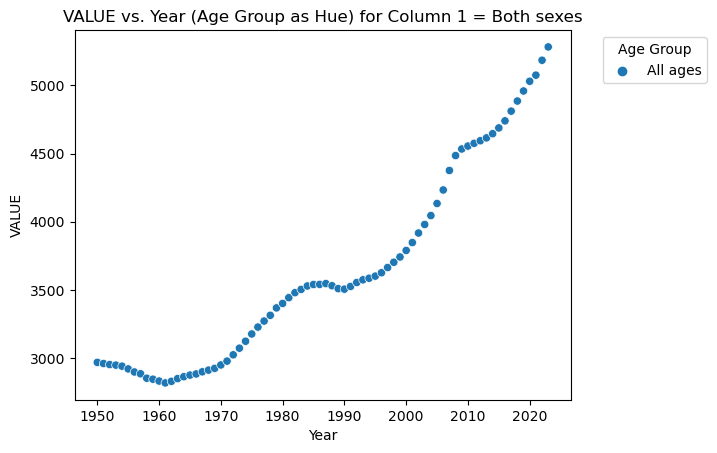

In [26]:
sns.scatterplot(data=filtered_data_df2_Both_sexes_All_ages,x='Year', y='VALUE', hue='Age Group')

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.title(f'VALUE vs. Year (Age Group as Hue) for Column 1 = {df2_Both_sexes}')

# Display the plot
legend = plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


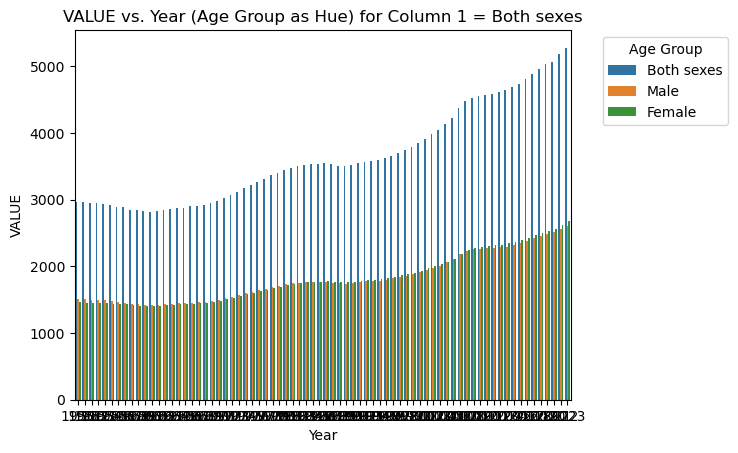

In [27]:
filtered_data_All_ages = df2[df2['Age Group'] == 'All ages']

sns.barplot(data = filtered_data_All_ages, x='Year', y='VALUE', hue='Sex')

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.title(f'VALUE vs. Year (Age Group as Hue) for Column 1 = {df2_Both_sexes}')

# Display the plot
legend = plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

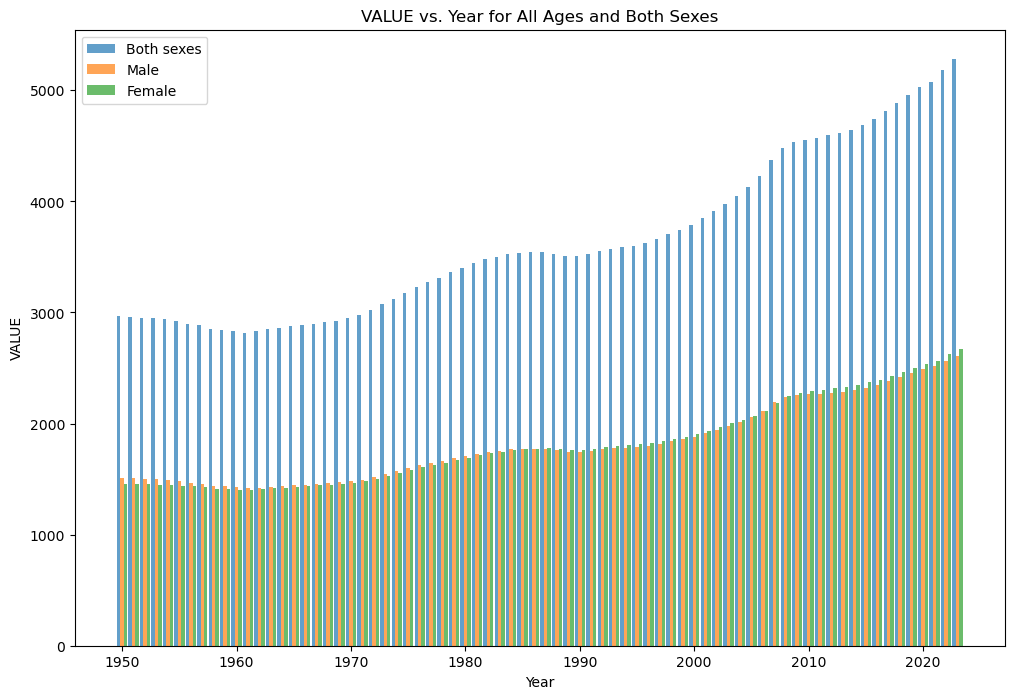

In [29]:
filtered_data = df2[df2['Age Group'] == 'All ages']

# Pivot the filtered DataFrame
pivoted_df = pd.pivot_table(filtered_data, values='VALUE', index='Year', columns='Sex', aggfunc='sum')

# Optionally, fill missing values with 0
pivoted_df = pivoted_df.fillna(0)

# Create a grouped bar chart
plt.figure(figsize=(12, 8))  # Set the figure size

x = pivoted_df.index
y_both_sexes = pivoted_df['Both sexes']
y_male = pivoted_df['Male']
y_female = pivoted_df['Female']

bar_width = 0.3  # Adjust as needed

plt.bar(x - bar_width, y_both_sexes, width=bar_width, label='Both sexes', alpha=0.7)
plt.bar(x, y_male, width=bar_width, label='Male', alpha=0.7)
plt.bar(x + bar_width, y_female, width=bar_width, label='Female', alpha=0.7)

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.title('VALUE vs. Year for All Ages and Both Sexes')
plt.legend()

# Display the plot
plt.show()


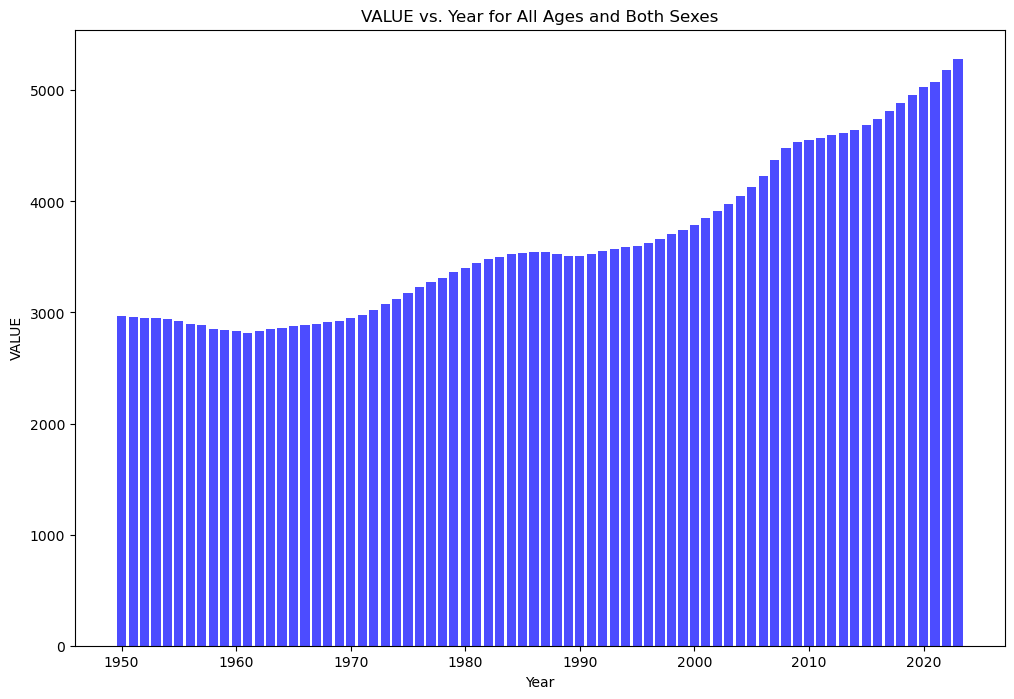

In [30]:
filtered_data = df2[df2['Age Group'] == 'All ages']

# Pivot the filtered DataFrame
pivoted_df = pd.pivot_table(filtered_data, values='VALUE', index='Year', columns='Sex', aggfunc='sum')

# Select only the 'Both sexes' column
y_both_sexes = pivoted_df['Both sexes']

# Create a bar chart for 'Both sexes'
plt.figure(figsize=(12, 8))  # Set the figure size

x = y_both_sexes.index

plt.bar(x, y_both_sexes, color='blue', alpha=0.7)

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.title('VALUE vs. Year for All Ages and Both Sexes')

# Display the plot
plt.show()


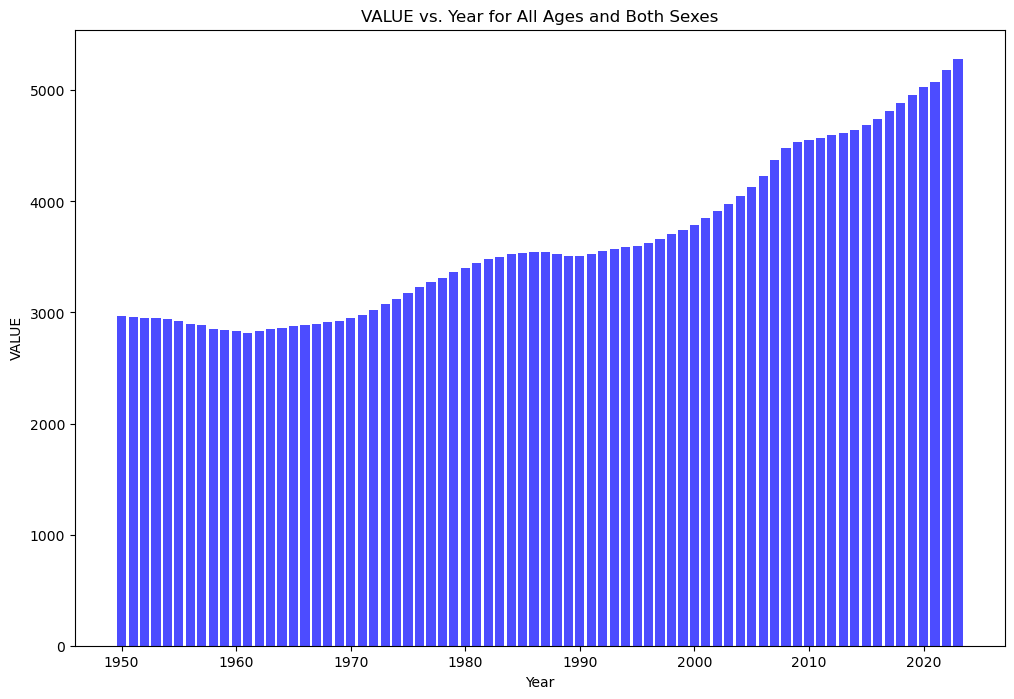

In [31]:
filtered_data = df2[(df2['Age Group'] == 'All ages') & (df2['Sex'] == 'Both sexes')]

# Create a bar chart
plt.figure(figsize=(12, 8))  # Set the figure size

x = filtered_data['Year']
y = filtered_data['VALUE']

plt.bar(x, y, color='blue', alpha=0.7)

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.title('VALUE vs. Year for All Ages and Both Sexes')

# Display the plot
plt.show()


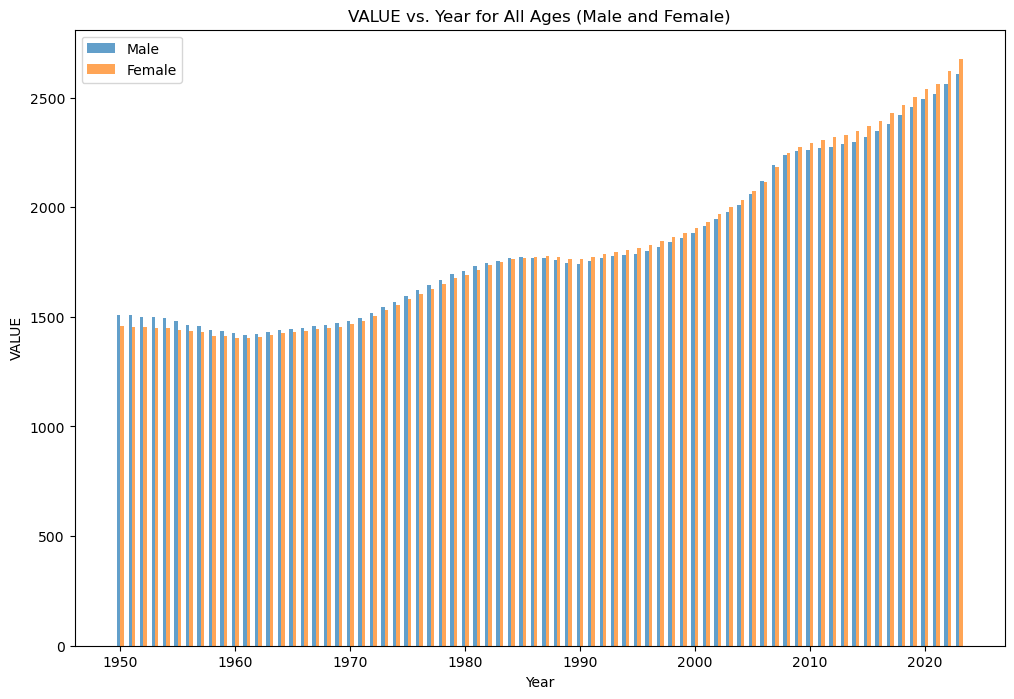

In [32]:
filtered_data = df2[df2['Age Group'] == 'All ages']

# Filter the DataFrame to include only rows where 'Sex' is either "Male" or "Female"
filtered_data = filtered_data[filtered_data['Sex'].isin(['Male', 'Female'])]

# Pivot the filtered DataFrame
pivoted_df = pd.pivot_table(filtered_data, values='VALUE', index='Year', columns='Sex', aggfunc='sum')

# Optionally, fill missing values with 0
pivoted_df = pivoted_df.fillna(0)

# Create a grouped bar chart
plt.figure(figsize=(12, 8))  # Set the figure size

x = pivoted_df.index
y_male = pivoted_df['Male']
y_female = pivoted_df['Female']

bar_width = 0.3  # Adjust as needed

plt.bar(x - bar_width/2, y_male, width=bar_width, label='Male', alpha=0.7)
plt.bar(x + bar_width/2, y_female, width=bar_width, label='Female', alpha=0.7)

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.title('VALUE vs. Year for All Ages (Male and Female)')
plt.legend()

# Display the plot
plt.show()

### Dropping vs imputing

In [33]:
df2.isnull().sum()

STATISTIC Label      0
Year                 0
Age Group            0
Sex                  0
UNIT                 0
VALUE              114
dtype: int64

In [34]:
df2_dropped_data = df2.dropna()

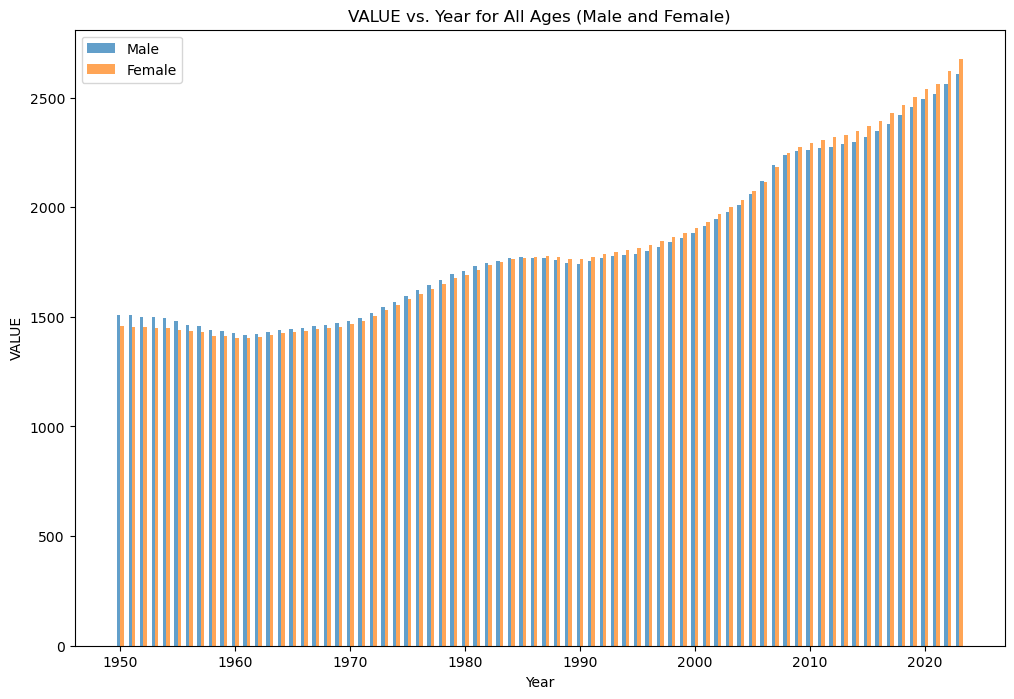

In [35]:
filtered_data = df2[df2['Age Group'] == 'All ages']

# Pivot the filtered DataFrame
pivoted_df = pd.pivot_table(filtered_data, values='VALUE', index='Year', columns='Sex', aggfunc='sum')

# Optionally, fill missing values with 0
pivoted_df = pivoted_df.fillna(0)

# Create a grouped bar chart
plt.figure(figsize=(12, 8))  # Set the figure size

x = pivoted_df.index
y_both_sexes = pivoted_df['Both sexes']
y_male = pivoted_df['Male']
y_female = pivoted_df['Female']

bar_width = 0.3  # Adjust as needed

plt.bar(x - bar_width, y_both_sexes, width=bar_width, label='Both sexes', alpha=0.7)
plt.bar(x, y_male, width=bar_width, label='Male', alpha=0.7)
plt.bar(x + bar_width, y_female, width=bar_width, label='Female', alpha=0.7)

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.title('VALUE vs. Year for All Ages and Both Sexes')
plt.legend()

# Display the plot
plt.show()


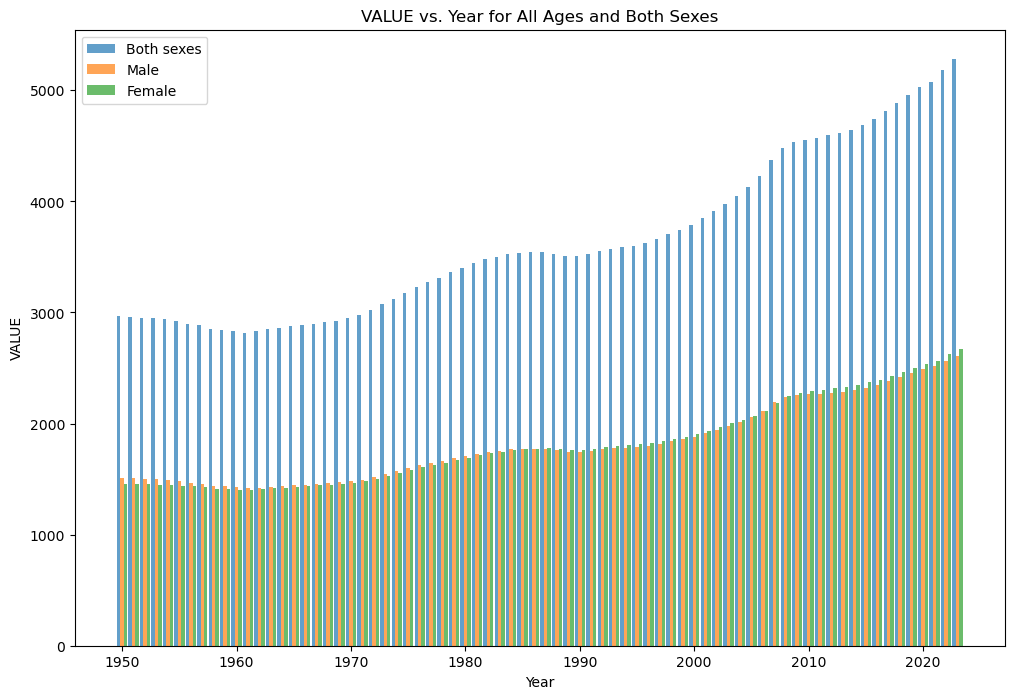

In [36]:
filtered_data = df2_dropped_data[df2_dropped_data['Age Group'] == 'All ages']

# Pivot the filtered DataFrame
pivoted_df = pd.pivot_table(filtered_data, values='VALUE', index='Year', columns='Sex', aggfunc='sum')

# Optionally, fill missing values with 0
pivoted_df = pivoted_df.fillna(0)

# Create a grouped bar chart
plt.figure(figsize=(12, 8))  # Set the figure size

x = pivoted_df.index
y_both_sexes = pivoted_df['Both sexes']
y_male = pivoted_df['Male']
y_female = pivoted_df['Female']

bar_width = 0.3  # Adjust as needed

plt.bar(x - bar_width, y_both_sexes, width=bar_width, label='Both sexes', alpha=0.7)
plt.bar(x, y_male, width=bar_width, label='Male', alpha=0.7)
plt.bar(x + bar_width, y_female, width=bar_width, label='Female', alpha=0.7)

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.title('VALUE vs. Year for All Ages and Both Sexes')
plt.legend()

# Display the plot
plt.show()


<Axes: xlabel='VALUE', ylabel='Count'>

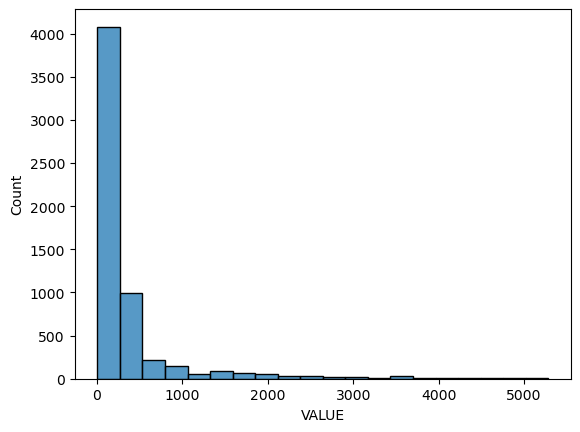

In [47]:
sns.histplot(df2_dropped_data['VALUE'], bins=20)



<Axes: xlabel='Year', ylabel='VALUE'>

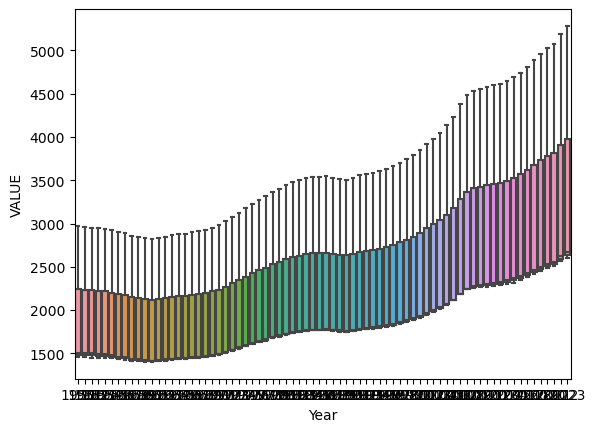

In [51]:
sns.boxplot(x=filtered_data['Year'], y=filtered_data['VALUE'], data=filtered_data)

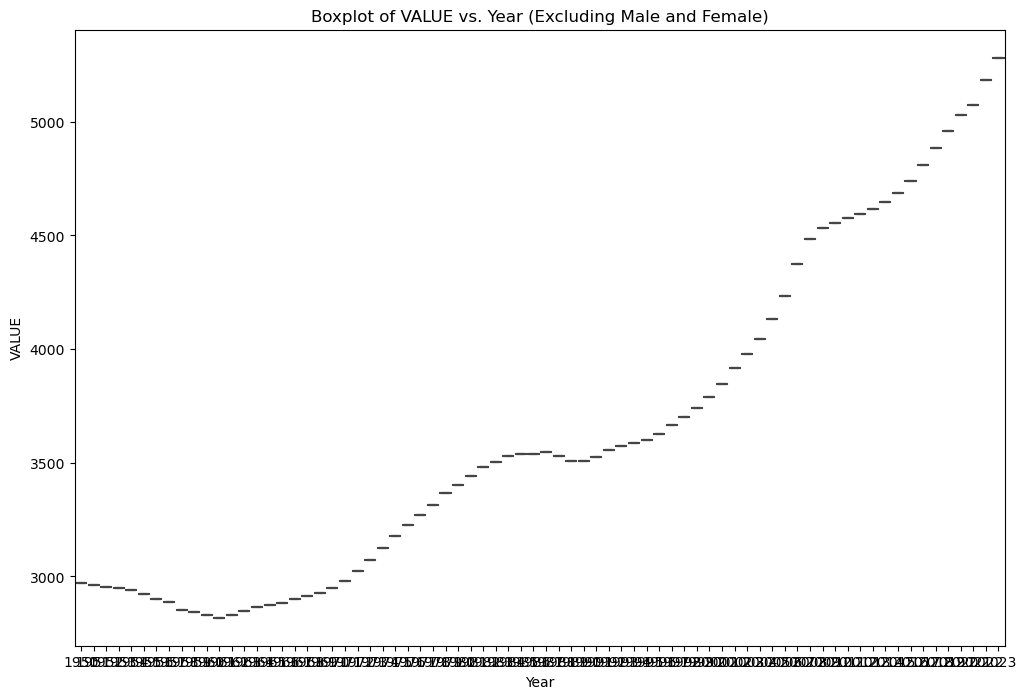

In [52]:
excluded_categories = ['Male', 'Female']
filtered_data_no_male_female = filtered_data[~filtered_data['Sex'].isin(excluded_categories)]

# Create a boxplot
plt.figure(figsize=(12, 8))  # Set the figure size
sns.boxplot(x='Year', y='VALUE', data=filtered_data_no_male_female)

# Add labels and a title
plt.xlabel('Year')
plt.ylabel('VALUE')
plt.title('Boxplot of VALUE vs. Year (Excluding Male and Female)')

# Display the plot
plt.show()

<Axes: xlabel='Year', ylabel='VALUE'>

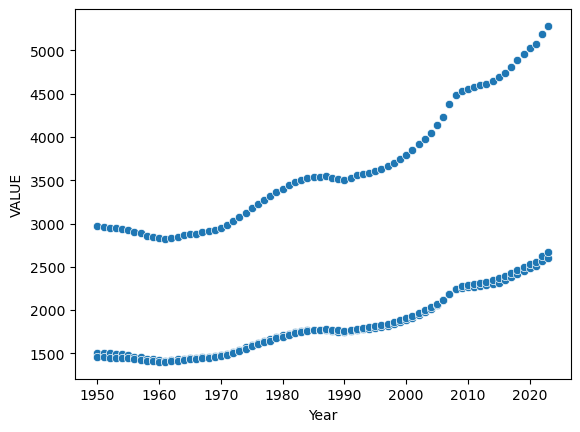

In [50]:
sns.scatterplot(x=filtered_data['Year'], y=filtered_data['VALUE'], data=filtered_data)


In [53]:
correlation_matrix = filtered_data.corr()


C:\Users\ruair\AppData\Local\Temp\ipykernel_76444\2913170002.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_data.corr()


In [54]:
correlation_matrix = filtered_data.corr(numeric_only=True)

<Axes: >

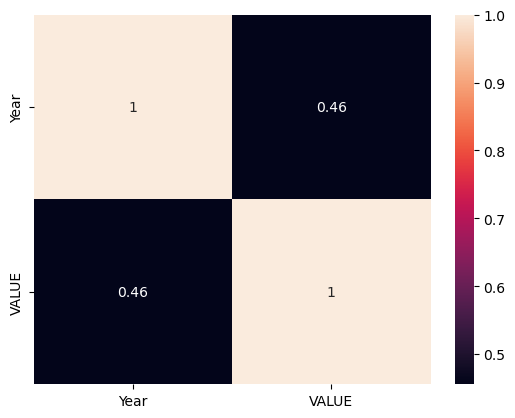

In [55]:
sns.heatmap(correlation_matrix, annot=True)


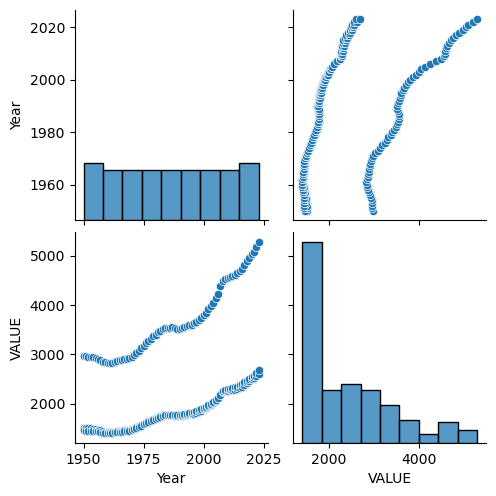

In [56]:
sns.pairplot(filtered_data)


In [59]:
mean_by_age_group = 















.groupby('Age Group')['VALUE'].mean()
print(mean_by_age_group)

Age Group
0 - 14 years          622.635135
0 - 4 years           205.597222
1 - 4 years           168.353153
10 - 14 years         207.109009
15 - 19 years         195.991892
15 - 24 years         369.337387
15 years and over    1804.922072
20 - 24 years         173.348198
25 - 29 years         164.447297
25 - 44 years         650.440991
30 - 34 years         165.839640
35 - 39 years         164.253604
40 - 44 years         155.901802
45 - 49 years         144.372523
45 - 64 years         502.469820
5 - 9 years           209.287387
50 - 54 years         132.279279
55 - 59 years         119.970270
60 - 64 years         105.846396
65 - 69 years          92.927477
65 years and over     282.676577
70 - 74 years          76.995045
75 - 79 years          55.420270
80 - 84 years          34.179730
85 years and over      23.152252
All ages             2427.550901
Under 1 year           41.111261
Name: VALUE, dtype: float64


In [69]:
z_scores = np.abs(stats.zscore(df2['VALUE']))

# Define a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 99

# Identify outliers
outliers = (z_scores > threshold)
Value
# Filter the DataFrame to exclude outliers
df2_no_outliers = df2[~outliers]

# Display the shape of the original and modified DataFrames
print("Original DataFrame shape:", df2.shape)
print("DataFrame without outliers shape:", df2_no_outliers.shape)

Original DataFrame shape: (5994, 6)
DataFrame without outliers shape: (5994, 6)


<Axes: >

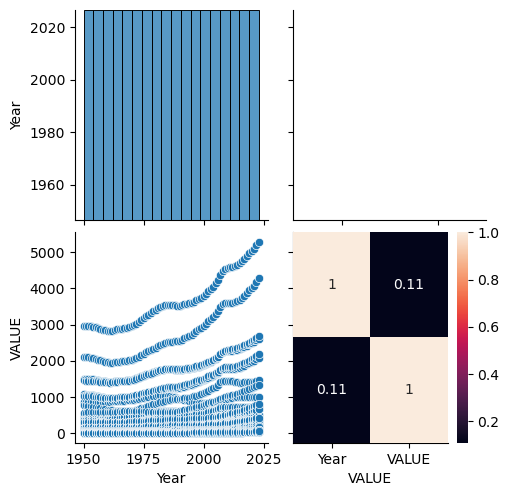

In [71]:
sns.pairplot(df2)
sns.heatmap(df2.corr(numeric_only=True), annot=True)


In [74]:
# Assuming 'Sex' is the column containing gender information in filtered_data
male_group = filtered_data[filtered_data['Sex'] == 'Male']['VALUE']
female_group = filtered_data[filtered_data['Sex'] == 'Female']['VALUE']

t_stat, p_value = stats.ttest_ind(male_group, female_group)

print(f"T-statistic: {t_stat}, p-value: {p_value}")


T-statistic: -0.06977891124283146, p-value: 0.9444651158987878


In [78]:


# Assuming 'Sex' and 'Age Group' are the actual column names in df2
contingency_table = pd.crosstab(df2['Sex'], df2['VALUE'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi2 Stat: {chi2_stat}, p-value: {p_value}")


Chi2 Stat: 7314.859890109891, p-value: 2.6674194935174897e-06
